In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Data Handling Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check installed versions
import matplotlib
import sklearn

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)

Numpy version: 2.0.2
Pandas version: 2.2.2
Seaborn version: 0.13.2
Matplotlib version: 3.10.0
Scikit-learn version: 1.6.1


In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('diabetes.csv')  # Make sure the file is in the right directory

# View the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Get a quick statistical summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for missing data
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


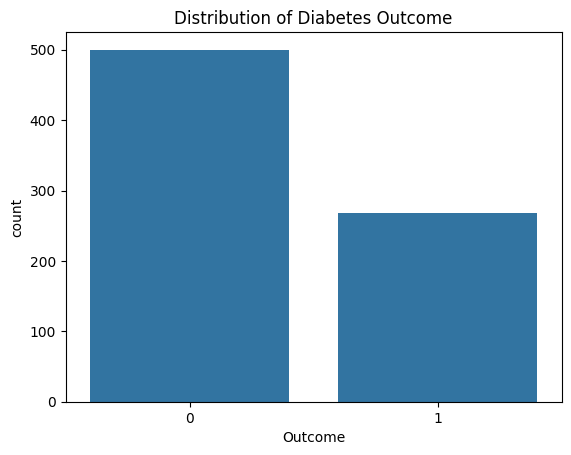

In [ ]:
# Plot the distribution of the 'Outcome' column (target variable)
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.show()


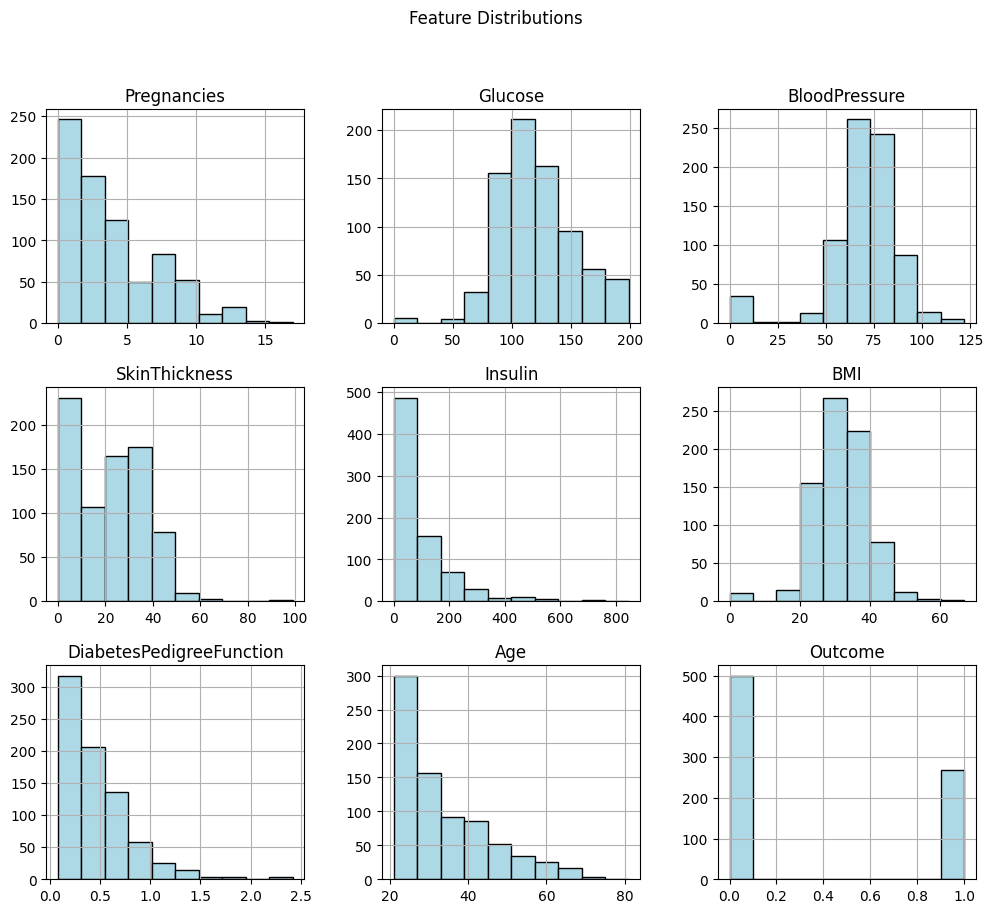

In [ ]:
# Plot histograms for all numeric columns
df.hist(bins=10, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


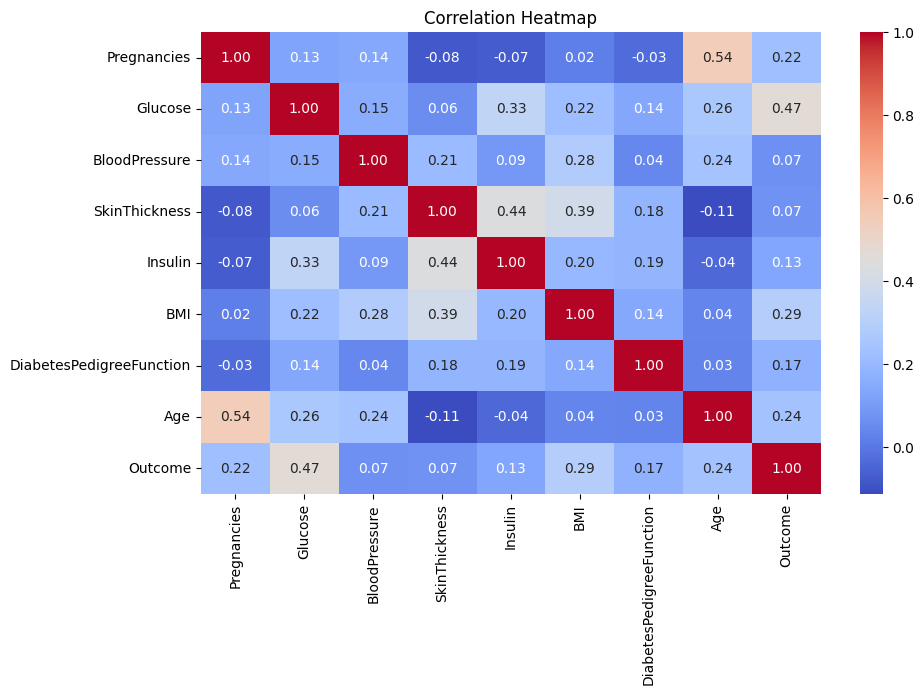

In [ ]:
# Plot a heatmap to visualize correlations between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Features and Target
X = df.drop('Outcome', axis=1)  # Drop the target column (Outcome)
y = df['Outcome']  # Target column

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)


Accuracy: 0.7532467532467533


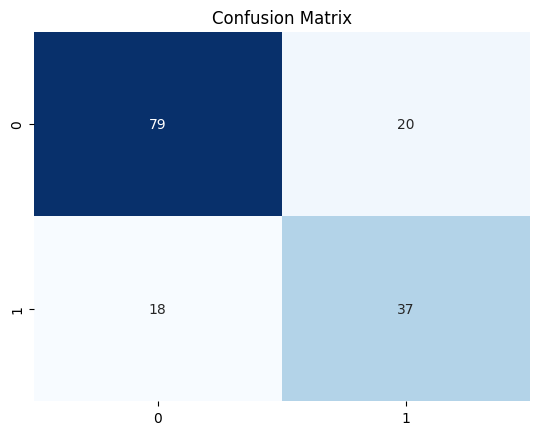

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solver options
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best model from GridSearchCV
best_log_reg_model = grid_search.best_estimator_

# Predict with the best model
y_pred_grid = best_log_reg_model.predict(X_test)

# Evaluate the performance of the best model
print("\nGridSearchCV Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'C': 10, 'solver': 'liblinear'}

GridSearchCV Model Evaluation:
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7272727272727273
Random Forest Confusion Matrix:
 [[78 21]
 [21 34]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7272727272727273
SVM Confusion Matrix:
 [[81 18]
 [24 31]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
import joblib

# Save the best model (Random Forest, SVM, or Logistic Regression)
joblib.dump(best_log_reg_model, 'best_log_reg_model.pkl')

# Load the model back to check
loaded_model = joblib.load('best_log_reg_model.pkl')

# Make a prediction with the loaded model
sample_data = X_test[0].reshape(1, -1)  # Sample test data
print("Predicted Class (from loaded model):", loaded_model.predict(sample_data))

Predicted Class (from loaded model): [0]


In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']